# Trabajo Práctico 1: Técnicas de Diseño
El presente trabajo busca evaluar el desarrollo y análisis de algoritmos de las primeras técnicas de diseño vistas en la materia.
La primera fecha de entrega del TP será el 01/05/23, mientras que la segunda fecha de entrega (con reducción de nota) será
el 12/05/23.

## Primera Parte: Problema de K-merge por División y Conquista
### Introducción
El problema de K-merge es el siguiente: se tienen K arreglos ordenados, y se quiere quiere obtener un único arreglo, también
ordenado, con todos los elementos de los arreglos originales (inclusive si hay repetidos). Por simplicidad para los diferentes
análisis se puede suponer que todos los arreglos tienen exactamente h elementos (por ende, la cantidad total de elementos es
n = K ∗ h).
Para resolver este problema, es posible que hayan visto en Algoritmos y Programación II un algoritmo que resuelve este
problema utilizando un Heap. Nos referiremos a este como el algoritmo que utiliza Heaps.
La idea en este caso será plantear otra solución y analizarla. Se propone el siguiente algoritmo por división y conquista, con
semejanzas a mergesort.
1. Caso base: cuando quede un único arreglo, simplemente devolver dicho arreglo.
2. En el caso general, dividir la cantidad de arreglos entre la primera mitad, y la segunda mitad, y luego invocar
recursivamente para cada mitad de arreglos. Es decir, si tenemos cuatro arreglos, invocamos para los primeros 2, y
luego para los segundos 2. Al terminar los llamados recursivos, tenemos dos arreglos ordenados. Estos deberán ser
intercalados ordenadamente, tal cual se realiza en mergesort.


### Consigna
1. Determinar, utilizando el Teorema Maestro, cuál sería la complejidad del algoritmo propuesto.
2. Describir el algoritmo que utiliza heaps, y determinar su complejidad.
3. Implementar ambos algoritmos, y hacer mediciones (y gráficos) que permitan entender si las complejidades obtenidas
para cada uno se condicen con la realidad.
4. En caso que la complejidad obtenida en el punto 1 no se condiga con la realidad, indicar por qué (qué condición falla).
En dicho caso, se requiere llegar a la complejidad correcta (no solamente enunciarla, sino demostrar cuál es).
5. Indicar cualquier conclusión adicional que les parezca relevante en base a lo analizado.

1. Determinar, utilizando el Teorema Maestro, cuál sería la complejidad del algoritmo propuesto.

El Teorema Maestro tiene la siguiente fórmula: 

T(n) = AT(n/B) + f(n)

Donde:

A -> cantidad de llamadas recursivas (con A natural)

B -> proporción del tamaño original con el que llamamos recursivamente (con B real mayor a 1 y cte)

f(n) -> costo del trabajo que hacemos en cada llamada recursiva

En este caso tenemos:
$$
\newline
A = 2
\newline
B = 2
\newline
f(n) = O(n^C)\; donde\; C = 1
\newline
log_B(A) = log_2(2) = 1 \rightarrow como\;  log_B(A) = C \rightarrow  O(n^c * log(n)) = O(n log(n))
$$
Siendo n = K ∗ h, con K la cantidad de arreglos y h la cantidad de elementos de cada arreglo.

2. Describir el algoritmo que utiliza heaps, y determinar su complejidad.

El algoritmo que utiliza heaps es el siguiente:

    1. Agregar a un heap el primer elemento de cada uno de los arrays junto con su índice y el índice del array al que pertenece.

    2. Mientras que el heap no esté vacío:
    
       a. Tomar el primer elemento del heap y agregar el valor al resultado.

       b. Si el índice del elemento tomado es menor al tamaño del array al que pertenece, agregar el siguiente elemento del array al heap junto con su índice y el índice del array al que pertenece.

    3. Devolver el resultado.

1 -> O(K)
2 -> K * h veces
  a -> O(log(K))
  b -> O(log(K))

O(K) + K * h * O(log(K)) -> O(K + K * h * log(K))
K << K * h * log(K), entonces se desprecia K y queda O(K * h * log(K))


Siendo K la cantidad de arreglos y h la cantidad de elementos de cada arreglo.

3. Implementar ambos algoritmos, y hacer mediciones (y gráficos) que permitan entender si las complejidades obtenidas
para cada uno se condicen con la realidad.

In [1]:
PRINT = False

In [2]:
from heapq import heappush, heappop

def heap_mergeK_sorted(arrays):
    result = []
    heap = []

    for i in range(len(arrays)):
        heappush(heap, (arrays[i][0], i, 0))
    
    while heap:
        if PRINT:
            print(f"El resultado parcial es: {result}")
            print(f"Los elementos en el heap son: {heap}")
        value, array_indice, value_indice = heappop(heap)
        result.append(value)
        if value_indice + 1 < len(arrays[array_indice]):
            heappush(heap, (arrays[array_indice][value_indice + 1], array_indice, value_indice + 1))
        
    return result


arrays = [
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
]

result = heap_mergeK_sorted(arrays)
print(f"Lista ordenada: {result}")
print(f"¿Está ordenada?: {result == sorted(result)}")

Lista ordenada: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28]
¿Está ordenada?: True


In [3]:
def merge(left_array, right_array): # O(n) -> n = len(left_array) + len(right_array)
    result = []
    
    i = 0
    j = 0
    while i < len(left_array) and j < len(right_array):
        if left_array[i] < right_array[j]:
            result.append(left_array[i])
            i += 1
        else:
            result.append(right_array[j])
            j += 1
    
    if i < len(left_array):
        result.extend(left_array[i:])
    if j < len(right_array):
        result.extend(right_array[j:])
    return result
     
def _dyc_mergeK_sorted(arrays, start, end):
    if start == end:
        return arrays[start]
        
    mid = (start + end) // 2
    left = _dyc_mergeK_sorted(arrays, start, mid)
    right = _dyc_mergeK_sorted(arrays, mid + 1, end)
    if PRINT:
        print(f"Voy a mergear:")
        print(f"-> izquierda: {left}")
        print(f"-> derecha: {right}")
    return merge(left, right)

def dyc_mergeK_sorted(arrays):
    return _dyc_mergeK_sorted(arrays, 0, len(arrays) - 1)

arrs = [
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
]

result = dyc_mergeK_sorted(arrs)
print(f"Lista ordenada: {result}")
print(f"¿Está ordenada?: {result == sorted(result)}")


Lista ordenada: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28]
¿Está ordenada?: True


In [4]:
!pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import random
from time import time
from matplotlib import pyplot as plt

def generate_arrays(k, h):
    arrays = []
    for _ in range(k):
        array = []
        for _ in range(h):
            array.append(random.randint(0, k*h))
        array.sort()
        arrays.append(array)
    return arrays

In [6]:
array_arrays = []
for k in range(1, 500):
    arrays = generate_arrays(k, k)
    array_arrays.append(arrays)

In [7]:
heap_merge_times = {}
for arrays in array_arrays:
    k = len(arrays)
    start = time()
    heap_mergeK_sorted(arrays)
    end = time()
    heap_merge_times[k*k] = end - start    

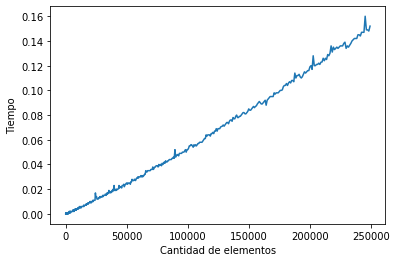

In [8]:
plt.plot(heap_merge_times.keys(), heap_merge_times.values())
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo')
plt.show()

In [9]:
dyc_merge_times = {}

for array in array_arrays:
    k = len(array)   
    start = time()
    resultado = dyc_mergeK_sorted(array)
    end = time()
    dyc_merge_times[k*k] = end - start

In [10]:
# heap_merge_times.values()
suma = 0
for value in heap_merge_times.values():
    suma += value
suma

23.08557415008545

In [11]:
suma = 0
for value in dyc_merge_times.values():
    suma += value
suma

58.2854950428009

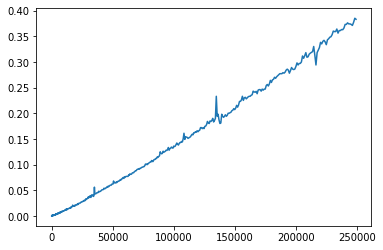

In [12]:
plt.plot(dyc_merge_times.keys(), dyc_merge_times.values())
plt.show()

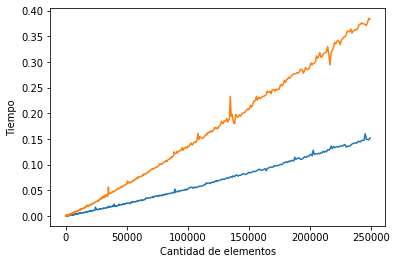

In [13]:
plt.plot(heap_merge_times.keys(), heap_merge_times.values())
plt.plot(dyc_merge_times.keys(), dyc_merge_times.values())
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo')
plt.show()

En el punto 1 se obtuvo que la complejidad del algoritmo propuesto es O(n log(n)), siendo n = K ∗ h, con K la cantidad de arreglos y h la cantidad de elementos de cada arreglo. Sin embargo, con las mediciones del punto 3 se puede ver que la complejidad en realidad es diferente.  

Entonces verificamos las condiciones del Teorema Maestro para ver si se cumplen:
- A debe ser un número natural: Sí, A = 2
- B debe ser un número real mayor a 1: Sí, B = 2
- B debe ser constante: Sí, B = 2 a lo largo de todas las llamadas recursivas
- El caso base es constante: Sí, el caso base es cuando queda un único arreglo, y en ese caso la complejidad es O(1)





## Segunda Parte: ¡Problema de contrabando!
#### Historia y Estado de la situación
Genovia y Krakozhia son países limítrofes muy disímiles. Entre sus muchas diferencias, se encuentran los productos que se
pueden producir o ingresar a uno y otro país. En particular, Krakozhia pertenece a la Unión Europea, haciendo que sea muy
restrictiva con algunas clases de productos1
.

Por el contrario, el Reino de Genovia casi no tiene restricciones ni en el acceso ni en la producción de productos. Este es uno
de los problemas que tienen con sus vecinos de la Unión Europea (el otro, es ser considerando un paraíso fiscal).
Es muy común que ciudadanos de Krakozhia viajen a Genovia, y aprovechen su estadía para comprar productos que no
podrían comprar en su país. Incluso hay quienes aprovechan para comprar bastantes productos, para luego revenderlos
en Krakozhia, a un alto precio. ¿El problema? es ilegal entrar con esos productos a la Unión Europea, y en particular a
Krakozhia, por lo que sus agentes aduaneros deberían confiscarles los productos (y potencialmente labrarles un acta o algún
otro tipo de sansión). ¿Lo bueno? Los agentes aduaneros de Krakozhia no destacan por su honestidad. El menos corrupto no
puede armar una declaración jurada de ingresos medianamente creíble. Esto quiere decir que al pasar por la aduana, un
agente aduanero puede pedir, en concepto de soborno, una cierta cantidad de algunos productos que se lleve consigo (luego de
revisarlos), el cual debe pagarse sí o sí, si no se quiere caer en serios problemas.
Planteo del problema
Queremos pasar mercadería de contrabando de Genovia a Krakozhia. La mercadería viene en paquetes que no podemos abrir.
Cada paquete i trae Xi unidades de un determinado tipo de producto j. Podríamos llegar a tener varios paquetes del mismo
tipo de producto j, incluso con diferente cantidad de unidades. También podemos tener diferentes paquetes de diferentes
productos. Es decir, cada paquete (in-abrible) es de una cantidad específica de un tipo específico, y en total para un tipo
específico j tenemos la suma de Xi unidades, para todos los i que sean de ese tipo.
Para nuestro ejemplo, supongamos que tenemos un paquete que trae 8 cajetillas de cigarrillos sabor arándano. Otro paquete
trae 5 cajetillas de lo mismos cigarrillos. Otro paquete puede traer 5 botellitas de 100ml de vodka radioactivo, etc. . .
Al pasar por la aduana, el corrupto funcionario puede indicarnos que “por acá no pasan sin dejarme al menos 6 cajetillas de
cigarrillos de arándano”.
Ante la imposibilidad de abrir y/o separar los paquetes, es claro que en dicho caso nos conviene dejar el paquete de 8 (no
podemos abrirlo para sacar 6 de allí. . . sino la movida sería muy evidente). Si el oficial hubiera dicho que hay que dejar
al menos 10 cajetillas, habría sido necesario dejar ambos paquetes para un total de 13 unidades de dicho producto. Si este
hubiera dicho que le dejemos una cajetilla de cigarrillos y una botellita de vodka, tendríamos que dejar el paquete de 5
botellitas de vodka y el paquete de 5 cajetillas de cigarrillos.

#### Consigna
1. Describir e implementar un algoritmo greedy que, dado un input con los productos que se tienen, y lo pedido como
soborno, nos permita salir airosos de la situación, con la mayor cantidad de productos posibles. Justificar por qué el
algoritmo es, efectivamente, greedy. Considerar que siempre se nos pedirá una cantidad de productos en existencias (en
nuestro ejemplo anterior, no nos habrían pedido que dejemos 7 botellas de vodka radioactivo, ni tampoco mandarinas
del Sahara).
2. Con las mismas consideraciones que en el punto anterior, describir e implementar un algoritmo (que sea óptimo) que
resuelva el problema utilizando programación dinámica.
3. Indicar y justificar la complejidad de ambos algoritmos propuestos. Indicar casos (características y ejemplos) de
deficiencias en el algoritmo greedy propuesto, para los cuales este no obtenga una solución óptima.
4. Implementar un programa que utilice ambos algoritmos, realizar mediciones y presentar resultados comparativos de
ambas soluciones, en lo que refiere a su optimalidad de la solución (no de su complejidad). Incluir en la entrega del tp
los sets de datos utilizados para estas simulaciones (que deben estar explicados en el informe). Estos deben incluir al
menos una prueba de volumen, indicando cómo es que fueron generadas.


1. Describir e implementar un algoritmo greedy que, dado un input con los productos que se tienen, y lo pedido como
soborno, nos permita salir airosos de la situación, con la mayor cantidad de productos posibles. Justificar por qué el
algoritmo es, efectivamente, greedy. Considerar que siempre se nos pedirá una cantidad de productos en existencias (en
nuestro ejemplo anterior, no nos habrían pedido que dejemos 7 botellas de vodka radioactivo, ni tampoco mandarinas
del Sahara).

El algoritmo greedy que planteamos es el siguiente:
1. Ordenamos la lista de menor a mayor segun la cantidad de elementos que tiene cada paquete
2. Recorremos la lista comparando la cantidad de elementos con la cantidad de elementos pedidos
    - Si la cantidad de elementos es mayor que el pedido, devuelvo ese valor
    - Sino continuo recorriendo la lista hasta el ultimo elemento y vuelvo a iterar con (elementos pedidos - cantidad de elementos)
3. Finalmente, devuelvo el acumulado de los elementos que se necesitan

¿Pero por qué es Greedy?  
En los algoritmos Greedy se aplica una regla sencilla que permita obtener el máximo local, en este caso el máximo local es el primer paquete que iguale o supere a la cantidad pedida. En el caso de no encontrar un paquete que cumpla esto, se toma el paquete con mayor cantidad de elementos y se busca un óptimo local para la cantidad restante.

In [14]:
# Modelamos los datos del problema de la siguiente forma:
# Existencias -> {mandarinas_rgb: [1, 6, 10, 4, 7], creditos_fiuba: [200, 300, 500, 100, 400]}
# Soborno -> {mandarinas_rgb: 11, creditos_fiuba: 250}

def _soborno_greedy(existencias, minimo, acumulado):
    indice = 0
    soborno = existencias[indice]
    while soborno < minimo and indice < len(existencias) - 1:
        indice += 1
        soborno = existencias[indice]
    acumulado.append(existencias.pop(indice))
    if soborno >= minimo:
        return acumulado
    restante = minimo - soborno
    return _soborno_greedy(existencias, restante, acumulado)

def soborno_greedy(existencias, pedido): 
    soborno = {}
    for tipo in pedido.keys():
        existencias_ordenadas = sorted(existencias[tipo].copy())
        soborno[tipo] = _soborno_greedy(existencias_ordenadas, pedido[tipo], [])
    return soborno

In [15]:
pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_greedy(existencias, pedido))

pedido = {"creditos_fiuba": 9}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_greedy(existencias, pedido))

pedido = {"creditos_fiuba": 11}
existencias = {"creditos_fiuba": [1, 1, 5, 6, 9]}
print(soborno_greedy(existencias, pedido))

{'creditos_fiuba': [7]}
{'creditos_fiuba': [7, 2]}
{'creditos_fiuba': [9, 5]}


2. Con las mismas consideraciones que en el punto anterior, describir e implementar un algoritmo (que sea óptimo) que
resuelva el problema utilizando programación dinámica.

La primera opción que se nos ocurrió fue la siguiente:  
1. Tomamos el primer paquete de la lista  
2. Vemos la cantidad de paquetes restantes en la lista  
  a. Si no quedan devolvemos el paquete que acabamos de tomar  
  b. Si quedan, pero en conjunto no alcanzan a cubrir la cantidad pedida, devolvemos una lista vacía (no hay solución con estos paquetes)  
  c. Si quedan y en conjunto alcanzan a cubrir la cantidad pedida, vamos a tener que ver dos casos distintos (tomando el paquete actual y no tomándolo)  
3. Calculamos el soborno restante teniendo en cuenta a ese elemento  
  a. Si el total de la sumatoria de los paquetes restantes (punto 2) no alcanza a cubrir el soborno es porque hay que tener en cuenta al primer paquete (punto 1), entonces devolvemos al primer paquete y el resultado del cálculo del punto 3  
  b. En caso contrario hay que hacer el cálculo sin tener en cuenta al primer paquete  
4. Calculamos el soborno restante sin tener en cuenta a ese elemento  
5. Comparamos los resultados de los puntos 3 y 4 y devolvemos el que tenga sume menor cantidad de elementos

In [16]:
def _soborno_dinamico_beta(existencias, pedido):
    if len(existencias) == 0:
        return []
    elemento = existencias[0]
    elementos_restantes = existencias[1:]    
    total_restante = sum(elementos_restantes)

    # considerando el elemento
    restante = pedido - elemento
    if restante == 0:
        return [elemento]
    if total_restante < restante:
        return []
    soborno_restante = _soborno_dinamico_beta(elementos_restantes, restante)

    # sin considerar el elemento
    if total_restante < pedido:
        return [elemento] + soborno_restante
    soborno_sin_elemento = _soborno_dinamico_beta(elementos_restantes, pedido)
    
    total_con_elemento = sum([elemento] + soborno_restante)
    total_sin_elemento = sum(soborno_sin_elemento)
    if total_con_elemento < total_sin_elemento:
        return [elemento] + soborno_restante
    return soborno_sin_elemento
  

def soborno_dinamico_beta(existencias, pedido):
    soborno = {}
    for tipo in pedido.keys():
        soborno[tipo] = _soborno_dinamico_beta(existencias[tipo], pedido[tipo])
    return soborno

In [17]:
pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_dinamico_beta(existencias, pedido))

pedido = {"creditos_fiuba": 9}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_dinamico_beta(existencias, pedido))

pedido = {"creditos_fiuba": 11}
existencias = {"creditos_fiuba": [1, 1, 5, 6, 9]}
print(soborno_dinamico_beta(existencias, pedido))

{'creditos_fiuba': [1, 5]}
{'creditos_fiuba': [2, 7]}
{'creditos_fiuba': [5, 6]}


El problema de éste método es que no memoriza los resultados de los cálculos que va haciendo, lo cual es algo importante para que el algo sea de programación dinámica. Por lo tanto decidimos cambiarlo a fin de encontrar una solución óptima.

El segundo approach que tomamos fue pensar al problema de forma inversa. En lugar de pensar qué era lo que se quedaba el funcionario, pensamos qué nos quedamos nosotros como comerciantes. De esta forma, quedaria un problema igual al problema de la mochila con valores iguales al peso. De esta forma, intentamos maximizar la cantidad de items que nos quedamos. Como este algoritmo es óptimo para encontrar el máximo en nuestro problema, también es óptimo para el problema inverso de minimizar la cantidad de elementos demas que le dejamos al funcionario.

In [18]:
def mochila_simple(capacidad, pesos, cantidad_elementos):
    matriz = [[0 for _ in range(capacidad + 1)] for _ in range(cantidad_elementos + 1)]

    # Calculamos la solución óptima usando programación dinámica
    for i in range(1, cantidad_elementos + 1):
        for w in range(1, capacidad + 1):
            if pesos[i-1] <= w:
                matriz[i][w] = max(pesos[i-1] + matriz[i-1][w-pesos[i-1]], matriz[i-1][w])
            else:
                matriz[i][w] = matriz[i-1][w]
    return matriz

def mochila_simple_problem_items(capacidad, pesos, cantidad_elementos):
    matriz = mochila_simple(capacidad, pesos, cantidad_elementos)
    # Reconstruimos la solución
    elementos = []
    w = capacidad
    for i in range(cantidad_elementos, 0, -1):
        if matriz[i][w] != matriz[i-1][w]:
            elementos.append(i-1)
            w -= pesos[i-1]
    return elementos

def _soborno_dinamico(existencias, pedido):
    cantidad_elementos = len(existencias)
    capacidad = sum(existencias) - pedido
    if capacidad == 0:
        return existencias
    elementos_propios = mochila_simple_problem_items(capacidad, existencias, cantidad_elementos)
    soborno = existencias.copy()
    for i in elementos_propios:
        elemento = existencias[i]
        soborno.remove(elemento)
    return soborno

def soborno_dinamico(existencias, pedido):
    soborno = {}
    existencias_copia = existencias.copy()
    for tipo in pedido.keys():
        soborno[tipo] = _soborno_dinamico(existencias_copia[tipo], pedido[tipo])
    return soborno


In [19]:
pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_dinamico(existencias, pedido))

pedido = {"creditos_fiuba": 9}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_dinamico(existencias, pedido))

pedido = {"creditos_fiuba": 11}
existencias = {"creditos_fiuba": [1, 1, 5, 6, 9]}
print(soborno_dinamico(existencias, pedido))

{'creditos_fiuba': [1, 5]}
{'creditos_fiuba': [2, 7]}
{'creditos_fiuba': [1, 1, 9]}


3. Indicar y justificar la complejidad de ambos algoritmos propuestos. Indicar casos (características y ejemplos) de
deficiencias en el algoritmo greedy propuesto, para los cuales este no obtenga una solución óptima.

Siendo:  
T -> Cantidad de distintos tipos extraños de productos solicitados  
N -> Cantidad máxima de paquetes en existencias de un tipo de producto  

**Algoritmo Greedy**  
Para un tipo puntual producto, con el algoritmo greedy el peor caso es tener que dar todos los paquetes de ese tipo, resultando en N llamadas recursivas al algoritmo greedy. Una llamada (sin recursividad) al algoritmo greedy tiene una complejidad de O(N) ya que recorre la lista de paquetes una vez. Por lo tanto, la complejidad del algoritmo greedy para un sólo tipo es O(N^2).
De esta forma, sindo T una cantidad variable, la complejidad del algoritmo greedy es O(T * N^2).

**Algoritmo de programación dinámica**  
Para el algoritmo del problema de la mochila, siento N' la cantidad de elementos y W la capacidad de la mochila, se sabe que la resolución con programación dinámica tiene una complejidad de O(N' * W).
Como nuestro algoritmo es una modificación del problema de la mochila, para definir la complejidad de nuestro algoritmo:
N' = N ya que la cantidad de elementos es igual a la cantidad de paquetes en existencias de un tipo de producto

Para ver quién es W vamos a definir una nueva variable:
D -> Diferencia máxima entre la cantidad de un tipo de elemento en existencias y la cantidad pedida de ese tipo de elemento

W = D ya que en nuestro problema, nuestro input para W es la cantidad _a quedarnos_ de un producto, por lo que W sería D. En el problema de la mochila, en el peor caso tiene un W muy grande, y en nuestro problema el peor caso se da cuando nos piden un porcentaje muy chico de un producto que tenemos.

De esta forma la complejidad para el algoritmo de programación dinámica, teniendo en cuenta que nos pueden pedir distintos tipos de productos, es O(T * N * D).

Análisis de Greedy y la solución óptima:
a. Si la solución óptima necesita de un único paquete, será la misma que devolverá Greedy porque es el primer paquete que cumple con el mínimo.
b. Si con x paquetes se puede llegar al mínimo, Greedy devolverá x paquetes, pero la solución óptima podría ser devolver más de x paquetes y Greedy nunca la tendrá en cuenta.
c. Si Greedy devuelve x paquetes (siendo x > 1), entre esos paquetes se encontrarán obligatoriamente los x - 1 paquetes más grandes del arreglo, por lo que la solución óptima podría ser devolver la misma cantidad de paquetes pero de menor tamaño, y Greedy nunca la tendrá en cuenta.
d. Teniendo en cuenta al arreglo ordenado, si la solución óptima cuenta con los x paquetes más grandes del arreglo, Greedy devolverá los x paquetes más grandes del arreglo, por lo que la solución óptima será la misma que la de Greedy.
e. (d bis) Si la solución óptima cuenta con los x paquetes más grandes del arreglo + 1 paquete más chico que el x-ésimo, Greedy devolverá los x paquetes más grandes del arreglo sumado a el primer elemento que cumpla con el mínimo, por lo que la solución óptima será la misma que la de Greedy.

a.
pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [2, 3, 5, 7]}

b.
pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}

pedido = {"creditos_fiuba": 11}
existencias = {"creditos_fiuba": [1, 1, 5, 6, 9]}

c.
pedido = {"creditos_fiuba": 18}
existencias = {"creditos_fiuba": [8, 10, 13, 15, 17]}

4. Implementar un programa que utilice ambos algoritmos, realizar mediciones y presentar resultados comparativos de
ambas soluciones, en lo que refiere a su optimalidad de la solución (no de su complejidad). Incluir en la entrega del tp
los sets de datos utilizados para estas simulaciones (que deben estar explicados en el informe). Estos deben incluir al
menos una prueba de volumen, indicando cómo es que fueron generadas.

In [20]:
import random

def generar_random_arrays(n):
    return [random.randint(1, 10 * n) for _ in range(n)]

def generar_diccionarios(n, jump): # max (2500, 15)
    diccionarios = []
    for i in range(10, n + 10, jump):
        dicc_i = {}
        elementos = i // 10
        for j in range(elementos):
            nombre = "elemento_raro" + str(j)
            arreglo = generar_random_arrays(i)
            dicc_i[nombre] = arreglo
        diccionarios.append(dicc_i)
    return diccionarios

In [21]:
def generar_coima(diccionario):
    coima = {}
    for key, value in diccionario.items():
        max = sum(value)
        cantidad = random.randint(0, max)
        if cantidad > 0:
            coima[key] = cantidad
    return coima

def generar_coimas(diccionario):
    coimas = []
    for d in diccionario:
        coimas.append(generar_coima(d))
    return coimas

In [22]:
def calcular_diferencia(coima, respuesta):
    diferencia_total = 0
    for elemento in coima.keys():
        requerido = coima[elemento]
        obtenido = sum(respuesta[elemento])
        diferencia = obtenido - requerido
        if diferencia < 0:
            print(f"{elemento} -> se pidio: {coima[elemento]}, se obtuvo {sum(respuesta[elemento])} ({respuesta[elemento]})")
            return -1
        diferencia_total += diferencia

    return diferencia_total

In [23]:
diccionarios = generar_diccionarios(150, 15)
coimas = generar_coimas(diccionarios)

In [24]:
error = -1

for i in range(len(diccionarios)):
    existencias = diccionarios[i]
    pedido = coimas[i]
    len_d = len(existencias["elemento_raro0"])
    obtenido = soborno_greedy(existencias, pedido)
    diferencia = calcular_diferencia(pedido, obtenido)
    if diferencia < 0:
        error = i
        break
    print(f"Diferencia{i} = {diferencia}")

print(f"Error: {error != -1}")

Diferencia0 = 16
Diferencia1 = 18
Diferencia2 = 12
Diferencia3 = 42
Diferencia4 = 25
Diferencia5 = 149
Diferencia6 = 124
Diferencia7 = 62
Diferencia8 = 161
Diferencia9 = 159
Error: False


In [25]:
error = -1

for i in range(len(diccionarios)):
    existencias = diccionarios[i]
    pedido = coimas[i]
    len_d = len(existencias["elemento_raro0"])
    obtenido = soborno_dinamico(existencias, pedido)
    diferencia = calcular_diferencia(pedido, obtenido)
    if diferencia < 0:
        error = i
        break
    print(f"Diferencia{i} = {diferencia}")

print(f"Error: {error != -1}")

Diferencia0 = 2
Diferencia1 = 0
Diferencia2 = 0
Diferencia3 = 0
Diferencia4 = 0
Diferencia5 = 0
Diferencia6 = 0
Diferencia7 = 0
Diferencia8 = 0
Diferencia9 = 0
Error: False
